# Imports

In [2]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from IPython.display import display, HTML

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Problem 1 - LDA
### For this multiclass LDA problem, I have calculated LD1 and LD2 and plotted them below against the target data. This shows clear separation between the classes and allows for effective classification. 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


LD1 explains  99.1212604965367 % of the variance.
LD2 explains  0.8787395034632781 % of the variance.


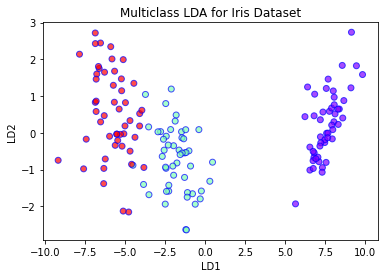

In [3]:
# Load Iris dataset 
iris = datasets.load_iris()
X = pd.DataFrame(iris["data"], columns=iris.feature_names)
y = pd.Categorical.from_codes(iris["target"], iris.target_names)
df = X.join(pd.Series(y, name='class'))

display(df)

le = LabelEncoder()
y = le.fit_transform(df['class'])

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
print("LD1 explains ", lda.explained_variance_ratio_[0]*100, "% of the variance.")
print("LD2 explains ", lda.explained_variance_ratio_[1]*100, "% of the variance.")

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title("Multiclass LDA for Iris Dataset")
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [4]:
ii_0 = np.where(y == 0)[0]
ii_1 = np.where(y == 1)[0]
ii_2 = np.where(y == 2)[0]

X_01 = X.drop(ii_2)
X_02 = X.drop(ii_1)
X_12 = X.drop(ii_0)

y_12 = y[np.where(y != 0)[0]]
y_01 = y[np.where(y != 2)[0]]
y_02 = y[np.where(y != 1)[0]]


lda_01 = LinearDiscriminantAnalysis()
X_lda_01 = lda_01.fit_transform(X_01, y_01)
print("LDA Setosa-Versicolor coefficients: ", lda_01.coef_)

lda_12 = LinearDiscriminantAnalysis()
X_lda_12 = lda_12.fit_transform(X_12, y_12)
print("LDA Versicolor-Virginica coefficients: ", lda_12.coef_)

lda_02 = LinearDiscriminantAnalysis()
X_lda_02 = lda_02.fit_transform(X_02, y_02)
print("LDA Setosa-Virginica coefficients: ", lda_02.coef_)


LDA Setosa-Versicolor coefficients:  [[ -3.05277023 -18.02295936  21.76619469  30.84416494]]
LDA Versicolor-Virginica coefficients:  [[-3.55630269 -5.57862064  6.97012768 12.38604115]]
LDA Setosa-Virginica coefficients:  [[-15.84134197 -12.02010579  36.51838264  36.7579844 ]]


# Problem 2 Gradient Descent and Logistic Regression
### Applied MinMax Scaler on X
### implemented Log Classification using Stochastic Gradient Descent
### implemented Log Classification using Mini-batch Gradient Descent
### tested accuracy using Cross Validation

In [5]:
# Download breast cancer dataset
breast_cancer = datasets.load_breast_cancer()

# apply MinMax Scaler on X 
X = breast_cancer.data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# split into X and y + categorical encoding  
X = pd.DataFrame(X, columns = breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer["target"], breast_cancer.target_names)
df = X.join(pd.Series(y, name='class'))
display(df)
le = LabelEncoder()
y = le.fit_transform(df['class'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,malignant
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,malignant
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,malignant
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,malignant
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,malignant
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,malignant
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,malignant
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,malignant


In [7]:
# sigmoid function
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return sigmoid(yhat)

# n: learning rate
# epochs: number of iterations 
def log_classifier_sgd(X, y, n, epochs):
    X = np.array(X)
    y = np.array(y)
    w = np.zeros_like(X[0])    # weights 
    w0 = 0                     # constant coefficient

    for epoch in range(1,epochs+1):
        X, y = shuffle(X, y)
        for i in range(len(X)):
            #compute gradient w.r.t 'w' 
            gr_wrt_w = X[i] * (y[i] - sigmoid(np.dot(w.T, X[i]) + w0))
            #compute gradient w.r.t 'w0'
            gr_wrt_w0 = y[i] - sigmoid(np.dot(w.T, X[i]) + w0)
            
            #update w, w0
            w = w - n * gr_wrt_w
            w0 = w0 - n * gr_wrt_w0

    return np.insert(w, 0, w0)

def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches
  
# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = np.dot(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
  
# function to compute the error for current values of theta
def cost(X, y, theta):
    h = np.dot(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]


def log_classifier_minibatch(X, y, n, epochs, batch_size):
    theta = np.zeros((X.shape[1], 1))
    error_list = []

    X = np.array(X)
    y = np.array(y)
    y = y[np.newaxis].T
    # w = np.zeros_like(X[0])    # weights 
    # w0 = 0                     # constant coefficient

    for epoch in range(1, epochs+1):
        # X, y = shuffle(X, y)
        batches = create_mini_batches(X, y, batch_size=batch_size)
        for batch in batches:
            X_mini, y_mini = batch
            theta = theta - n * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
  
    return theta, error_list


# print('Coefficients of Logistic Regression (SGD): ')
print(log_classifier_sgd(X, y, .0001, 50))

print(log_classifier_minibatch(X, y, .0001, 100, 50)[0])

[ 0.60254856  0.03275346  0.11226489  0.02563116 -0.01798402  0.17654888
  0.02419359 -0.05474987 -0.06157092  0.16726611  0.16851322 -0.01526296
  0.11701844 -0.01392293 -0.02747637  0.12020029  0.05167036  0.02214307
  0.06906638  0.1099457   0.05159808 -0.00834744  0.11667337 -0.0128803
 -0.0410177   0.15756263  0.00852385 -0.02098507 -0.0115318   0.08961932
  0.06270521]
[[ 0.11081276]
 [ 0.04084393]
 [ 0.11441906]
 [ 0.10727128]
 [-0.01171587]
 [ 0.07247983]
 [ 0.13310164]
 [ 0.16396894]
 [-0.00871216]
 [-0.07004774]
 [ 0.05958752]
 [-0.03554994]
 [ 0.05228376]
 [ 0.04949354]
 [-0.04407335]
 [ 0.00281375]
 [ 0.00077045]
 [ 0.0159926 ]
 [-0.03861524]
 [-0.02094387]
 [ 0.1404816 ]
 [ 0.06154382]
 [ 0.13637233]
 [ 0.11439582]
 [ 0.02624921]
 [ 0.08274229]
 [ 0.11184765]
 [ 0.18601146]
 [ 0.03310168]
 [ 0.01770484]]


In [119]:
# # Split a dataset into k folds
# def cross_validation_split(dataset, n_folds):
# 	dataset_split = list()
# 	dataset_copy = list(dataset)
# 	fold_size = int(len(dataset) / n_folds)
# 	for i in range(n_folds):
# 		fold = list()
# 		while len(fold) < fold_size:
# 			index = randrange(len(dataset_copy))
# 			fold.append(dataset_copy.pop(index))
# 		dataset_split.append(fold)
# 	return dataset_split

# # Calculate accuracy percentage
# def accuracy_metric(actual, predicted):
# 	correct = 0
# 	for i in range(len(actual)):
# 		if actual[i] == predicted[i]:
# 			correct += 1
# 	return correct / float(len(actual)) * 100.0

# # Evaluate an algorithm using a cross validation split
# def evaluate_algorithm(dataset, algorithm, n_folds, *args):
# 	folds = cross_validation_split(dataset, n_folds)
# 	scores = list()
# 	for fold in folds:
# 		train_set = list(folds)
# 		train_set.remove(fold)
# 		train_set = sum(train_set, [])
# 		test_set = list()
# 		for row in fold:
# 			row_copy = list(row)
# 			test_set.append(row_copy)
# 			row_copy[-1] = None
# 		predicted = algorithm(train_set, test_set, *args)
# 		actual = [row[-1] for row in fold]
# 		accuracy = accuracy_metric(actual, predicted)
# 		scores.append(accuracy)
# 	return scores

# # Make a prediction with coefficients
# def predict(row, coefficients):
# 	yhat = coefficients[0]
# 	for i in range(len(row)-1):
# 		yhat += coefficients[i + 1] * row[i]
# 	return 1.0 / (1.0 + exp(-yhat))

# # Estimate logistic regression coefficients using stochastic gradient descent
# def coefficients_sgd(train, l_rate, n_epoch):
# 	coef = [0.0 for i in range(len(train[0]))]
# 	for epoch in range(n_epoch):
# 		for row in train:
# 			yhat = predict(row, coef)
# 			error = row[-1] - yhat
# 			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
# 			for i in range(len(row)-1):
# 				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
# 	return coef

# # Linear Regression Algorithm With Stochastic Gradient Descent
# def logistic_regression(train, test, l_rate, n_epoch):
# 	predictions = list()
# 	coef = coefficients_sgd(train, l_rate, n_epoch)
# 	for row in test:
# 		yhat = predict(row, coef)
# 		yhat = round(yhat)
# 		predictions.append(yhat)
# 	return(predictions)

# dataset = X.join(pd.Series(y, name='class'))
# dataset = np.array(dataset)

# # normalize
# minmax = dataset_minmax(dataset)
# normalize_dataset(dataset, minmax)
# # evaluate algorithm
# n_folds = 5
# l_rate = 0.1
# n_epoch = 100
# scores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
# print('Scores: %s' % scores)
# print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()